In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = (10, 10)

In [40]:
def read_file(filename):
    bandwidthCoalesced = []
    bandwidthStrided = []
    stride = []

    with open(filename) as file:
        for line in file:
            if line[0:9] == 'Coalesced':
                bois = re.search(r'bw=\s*(.+?)GB/s', line)
                bandwidthCoalesced.append(bois.group(1))
            elif line[0:7] == 'Strided':
                bois = re.search(r'Strided\(\s(.+?)\).*bw=\s*(.+?)GB/s', line)
                stride.append(bois.group(1))
                bandwidthStrided.append(bois.group(2))
                
    data = np.zeros((len(bandwidthCoalesced), 3))
    data[:, 0] = bandwidthCoalesced
    data[:, 1] = bandwidthStrided
    data[:, 2] = stride


    df = pd.DataFrame(data)
    df.columns = ['bandwidthCoalesced', 'bandwidthStrided', 'Stride']

    return df

Text(0.5, 1.0, 'Bandwidth for Coalesced and Strided')

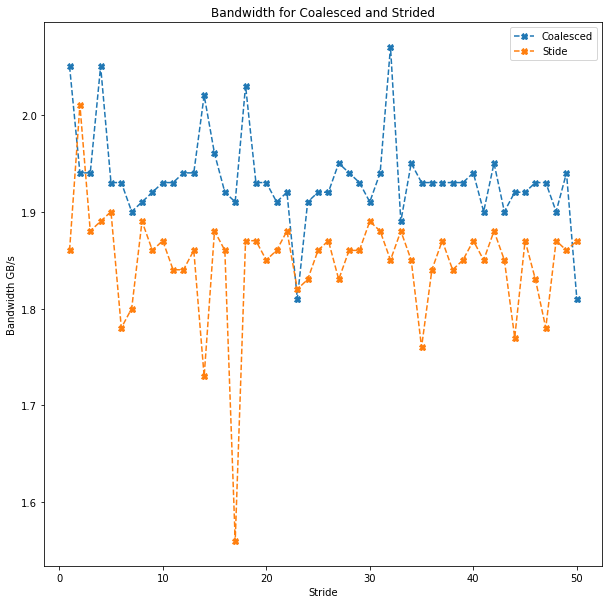

In [41]:
df = read_file('3_3_results.txt')
#df.plot(x='bandwidthCoalesced', y='Stride', legend=False, ylabel='Bandwidth GB/s', linestyle='--', marker='X', title='Bandwidth for 1 Block')

plt.plot(df['Stride'], df['bandwidthCoalesced'], label='Coalesced', linestyle='--', marker='X')
plt.plot(df['Stride'], df['bandwidthStrided'], label='Stide', linestyle='--', marker='X')
plt.legend()
plt.ylabel('Bandwidth GB/s')
plt.xlabel('Stride')
plt.title('Bandwidth for Coalesced and Strided')